the basic data structures are array-types, dict-types, set-types

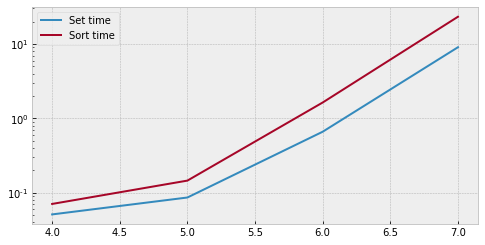

In [16]:
# Problem: Given unsorted lists A, B, which elements are both in A, B
# A and B both have length n

# take away: Using an unsorted set, we can construct an algorithm with O(n)
# using sorting, we can find O(n log n)

# it turns out, despite different asymptotics, in practice the first algorithm is not 
# always faster

from time import time
import numpy as np

def solution_set(A, B):

    in_A = set()
    in_both = set()

    for num in A:
        in_A.add(num)
    
    for num in B:
        if num in in_A:
            in_both.add(num)

    return in_both


def solution_sort(A, B):
    
    A = sorted(A)
    B = sorted(B)

    i, j = 0, 0
    
    in_both = set()

    while i < len(A) and j < len(B):
        
        if A[i] == B[j]:
            in_both.add(A[i])
            i = i + 1
            j = j + 1

        elif A[i] < B[j]:
            i = i + 1
        
        elif A[i] > B[j]:
            j = j + 1
        
    return in_both
    

timesa = []
timesb = []
lengths = [4, 5, 6, 7]
    
for length in lengths:
    length = int(10**length)
    A = np.random.randint(0, length, size=length).tolist()
    B = np.random.randint(0, length, size=length).tolist()

    time0 = time()
    sola = solution_set(A, B)
    timesa.append(time() - time0)
    time0 = time()
    solb = solution_sort(A, B)
    timesb.append(time() - time0)

    assert sola == solb, 'Not the same solutions'

import matplotlib.pyplot as plt
plt.style.use('bmh')

fig, ax = plt.subplots(1, 1, figsize=(8, 4))

ax.plot(lengths, timesa, label='Set time')
ax.plot(lengths, timesb, label='Sort time')

ax.legend()
ax.set_yscale('log')
plt.show()
